# AL Results Visualization

In this notebook, the goal is to visualize the results and compare the performance of the individual strategies with the respective model classes.

# Setup

In [427]:
# define the paths

import sys

basepath = "../"  # Project directory
sys.path.append(basepath)

# AL Scripts
AL_SCRIPTS_PATH = basepath + "al_lib/"

sys.path.append({AL_SCRIPTS_PATH})

from al_lib.active_learning_setting import ActiveLearningPaths

PATHS = ActiveLearningPaths()
(DATA_PATH, FIGURE_PATH, ENV_PATH, RESULTS_PATH, LOG_DIR) = PATHS
# sys.path.extend(PATHS)

sys.path

['/home/fhwn.ac.at/202375/.conda/envs/thesis/lib/python312.zip',
 '/home/fhwn.ac.at/202375/.conda/envs/thesis/lib/python3.12',
 '/home/fhwn.ac.at/202375/.conda/envs/thesis/lib/python3.12/lib-dynload',
 '',
 '/home/fhwn.ac.at/202375/.conda/envs/thesis/lib/python3.12/site-packages',
 '../',
 {'../al_lib/'},
 '../',
 '/home/fhwn.ac.at/202375/.conda/envs/thesis/lib',
 '../04_Active_Learning/results/',
 '../04_Active_Learning/results/figures/',
 '../data/',
 '../',
 {'../al_lib/'},
 '../',
 '/home/fhwn.ac.at/202375/.conda/envs/thesis/lib',
 '../04_Active_Learning/results/',
 '../04_Active_Learning/results/figures/',
 '../data/',
 '../',
 {'../al_lib/'},
 '../',
 '/home/fhwn.ac.at/202375/.conda/envs/thesis/lib',
 '../04_Active_Learning/results/',
 '../04_Active_Learning/results/figures/',
 '../data/',
 '../',
 {'../al_lib/'},
 '../',
 '/home/fhwn.ac.at/202375/.conda/envs/thesis/lib',
 '../04_Active_Learning/results/',
 '../04_Active_Learning/results/figures/',
 '../data/',
 '../',
 {'../al_l

## Include a logger

In [428]:
# import the logging specifications from file 'logging_config.py'
from al_lib.logging_config import create_logger
import datetime

# Add data/time information
date = datetime.datetime.now().strftime("%Y-%m-%d")
# date = now.strftime("%Y-%m-%d")
log_file_name = f"{date}_vis_al.log"
log_file_path = f"{LOG_DIR}{log_file_name}"

# Create logger
logging = create_logger(__name__, log_file_path = log_file_path)
# Usage of the logger as follows:
logging.info("Logging started")
logging.info(f"log stored at: {log_file_path}")

2024-07-02 20:48:47 - INFO - Logging started
2024-07-02 20:48:47 - INFO - log stored at: ../04_Active_Learning/logs/2024-07-02_vis_al.log


# Imports
## Packages

In [429]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.kernel_ridge import KernelRidge as KRR
import pandas as pd

# Import results table

In [430]:
# define the path to the data
TABLES_PATH = RESULTS_PATH + "al_result_tables/"

def load_data(filename):
    data = pd.read_csv(TABLES_PATH + filename)
    return data

In [431]:
# Import
# load the data
filename_krr = "al_results_KernelRidge'>.csv"

data_krr = load_data(filename_krr)

# rename the columns for better readability
for col in data_krr.columns:
    # rename the columns
    data_krr.rename(columns={col: col.replace('KernelRidge\'>', 'KRR')}, inplace=True)

data_krr.drop(columns=['Unnamed: 0'], inplace=True)
data_krr.head()

,rmse_test_KRR_random_0,rmse_val_KRR_random_0,sample_sel_KRR_random_0,rmse_full_KRR_random_0,rmse_test_KRR_gsx_0,rmse_val_KRR_gsx_0,sample_sel_KRR_gsx_0,rmse_full_KRR_gsx_0,rmse_test_KRR_gsy_0,rmse_val_KRR_gsy_0,...,sample_sel_KRR_gsx_4,rmse_full_KRR_gsx_4,rmse_test_KRR_gsy_4,rmse_val_KRR_gsy_4,sample_sel_KRR_gsy_4,rmse_full_KRR_gsy_4,rmse_test_KRR_uncertainty_4,rmse_val_KRR_uncertainty_4,sample_sel_KRR_uncertainty_4,rmse_full_KRR_uncertainty_4
0,236.165436,292.634460,1153.0,85.951596,216.680973,220.140122,771.0,85.951596,216.680973,220.140122,...,771.0,85.951596,173.806485,223.711295,676.0,85.951596,204.542470,236.649444,771.0,85.951596
1,179.558417,230.606482,653.0,85.951596,207.583822,213.801721,787.0,85.951596,179.245298,198.650271,...,787.0,85.951596,165.825834,184.613113,771.0,85.951596,199.504175,230.222798,787.0,85.951596
2,176.493179,230.804587,181.0,85.951596,200.042067,209.127018,1191.0,85.951596,196.225009,205.855466,...,1191.0,85.951596,166.024042,190.037258,132.0,85.951596,199.649982,230.194189,169.0,85.951596
3,190.405290,235.284204,93.0,85.951596,186.341837,198.437021,789.0,85.951596,207.508425,209.632782,...,789.0,85.951596,163.294541,184.384479,885.0,85.951596,191.437240,217.317044,847.0,85.951596
4,173.071534,232.769283,445.0,85.951596,172.013021,196.567628,838.0,85.951596,183.085810,195.988869,...,838.0,85.951596,167.729005,193.225857,27.0,85.951596,189.185705,214.200812,781.0,85.951596


In [432]:
# Import
# load the data
filename_pls = "al_results_PLSRegression'>.csv"

data_pls = load_data(filename_pls)

# rename the columns for better readability
for col in data_pls.columns:
    # rename the columns
    data_pls.rename(columns={col: col.replace('PLSRegression\'>', 'PLS')}, inplace=True)
    # data_pls.drop(columns=['Unnamed: 0'], inplace=True)
data_pls.drop(columns=['Unnamed: 0'], inplace=True)
# data_pls.drop(columns=['Unnamed: 0'], inplace=True)
data_pls.head()


,rmse_test_PLS_random_0,rmse_val_PLS_random_0,sample_sel_PLS_random_0,rmse_full_PLS_random_0,rmse_test_PLS_gsx_0,rmse_val_PLS_gsx_0,sample_sel_PLS_gsx_0,rmse_full_PLS_gsx_0,rmse_test_PLS_gsy_0,rmse_val_PLS_gsy_0,...,sample_sel_PLS_gsx_4,rmse_full_PLS_gsx_4,rmse_test_PLS_gsy_4,rmse_val_PLS_gsy_4,sample_sel_PLS_gsy_4,rmse_full_PLS_gsy_4,rmse_test_PLS_uncertainty_4,rmse_val_PLS_uncertainty_4,sample_sel_PLS_uncertainty_4,rmse_full_PLS_uncertainty_4
0,231.359344,277.793316,965.0,97.860683,213.817196,246.019716,771.0,97.860683,179.610642,206.717335,...,771.0,97.860683,235.059036,244.182908,724.0,97.860683,263.977178,278.873091,771.0,97.860683
1,213.632529,226.664473,312.0,97.860683,210.218089,241.240844,787.0,97.860683,168.759542,191.843336,...,787.0,97.860683,205.674124,277.784228,366.0,97.860683,261.568445,278.017511,302.0,97.860683
2,215.546178,217.375428,1078.0,97.860683,214.518093,238.341972,1191.0,97.860683,167.482778,179.222157,...,1191.0,97.860683,185.337696,189.318765,771.0,97.860683,223.717883,232.335846,889.0,97.860683
3,190.578281,193.344811,825.0,97.860683,165.475084,183.335423,789.0,97.860683,164.284186,178.088435,...,696.0,97.860683,178.223011,176.312778,696.0,97.860683,238.179020,247.465434,1090.0,97.860683
4,183.597340,178.947695,61.0,97.860683,171.096456,188.934896,838.0,97.860683,176.467702,186.645824,...,838.0,97.860683,161.160469,179.299261,516.0,97.860683,180.315485,197.845904,1014.0,97.860683


In [433]:
# Import
# load the data
filename_rf = "al_results_RandomForestRegressor'>.csv"

data_rf = load_data(filename_rf)

# rename the columns for better readability
for col in data_rf.columns:
    # rename the columns
    data_rf.rename(columns={col: col.replace('RandomForestRegressor\'>', 'RF')}, inplace=True)

data_rf.drop(columns=['Unnamed: 0'], inplace=True)
data_rf.head()

,rmse_test_RF_random_0,rmse_val_RF_random_0,sample_sel_RF_random_0,rmse_full_RF_random_0,rmse_test_RF_gsx_0,rmse_val_RF_gsx_0,sample_sel_RF_gsx_0,rmse_full_RF_gsx_0,rmse_test_RF_gsy_0,rmse_val_RF_gsy_0,...,sample_sel_RF_gsx_4,rmse_full_RF_gsx_4,rmse_test_RF_gsy_4,rmse_val_RF_gsy_4,sample_sel_RF_gsy_4,rmse_full_RF_gsy_4,rmse_test_RF_uncertainty_4,rmse_val_RF_uncertainty_4,sample_sel_RF_uncertainty_4,rmse_full_RF_uncertainty_4
0,184.589794,219.874075,1204.0,104.249969,184.091280,212.973768,771.0,102.226673,218.184387,219.651432,...,771.0,103.514842,205.181824,213.570886,930.0,102.785059,224.570442,223.329362,364.0,104.062409
1,182.625538,211.731689,219.0,104.249969,183.086717,220.352312,787.0,102.226673,186.896104,206.958202,...,787.0,103.514842,190.412122,208.738760,514.0,102.785059,232.069163,228.162719,431.0,104.062409
2,183.489023,210.155771,1093.0,104.249969,187.948906,228.875592,1191.0,102.226673,178.143006,207.800077,...,1191.0,103.514842,174.675728,200.669426,687.0,102.785059,221.187384,221.853422,1182.0,104.062409
3,180.071731,208.183716,721.0,104.249969,183.054373,225.039695,696.0,102.226673,174.246225,196.827775,...,724.0,103.514842,176.050437,195.978073,523.0,102.785059,220.770562,219.442118,144.0,104.062409
4,175.657648,208.621417,490.0,104.249969,187.249874,232.766954,838.0,102.226673,166.193416,194.505663,...,789.0,103.514842,179.595703,194.800260,947.0,102.785059,244.934348,235.352709,1021.0,104.062409


In [434]:
# Import
# load the data
filename_hgb = "al_results_HistGradientBoostingRegressor'>_manual.csv"

data_hgb = load_data(filename_hgb)

# rename the columns for better readability
for col in data_hgb.columns:
    # rename the columns
    data_hgb.rename(columns={col: col.replace('al_results_HistGradientBoostingRegressor\'>', 'HGB')}, inplace=True)

# data_pls.drop(columns=['Unnamed: 0'], inplace=True)
data_rf.shape

(250, 80)

In [435]:
from al_lib.selection_criteria import _random_selection, _gsx_selection, _gsy_selection, _uncertainty_selection

selection_criteria = [
    {'criteria':_random_selection, 'crit_name': 'random', 'kwargs': {}}, #'random_state': random_state}}, 
    {'criteria':_gsx_selection, 'crit_name': 'gsx', 'kwargs': {}}, 
    {'criteria':_gsy_selection, 'crit_name': 'gsy', 'kwargs': {}}, 
    {'criteria':_uncertainty_selection,'crit_name': 'uncertainty', 'kwargs': {'n_fold': 3}},
                      ]

In [436]:
# Import the sklearn models
from sklearn.kernel_ridge import KernelRidge as KRR
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_decomposition import PLSRegression

models = [KRR, RandomForestRegressor, PLSRegression]

# extract test rmse

In [437]:
def _seperate_results_test(results, model = None, model_name = None): 

    test_rsme_random = pd.DataFrame()
    test_rsme_gsx = pd.DataFrame()
    test_rsme_gsy = pd.DataFrame()
    test_rmse_uncertainty = pd.DataFrame()
    if model_name == None:
        model_name = str(model).split(" ")[1]
    if model == None:
        model_name = model_name
    if (model_name is None) & (model is None):
        raise ValueError("Please provide the model or model_name")
    test_rsme_random = pd.concat(
        [
            test_rsme_random,
            results.filter(regex=f"rmse_test_{model_name}_random"),
        ],
        axis=1,
    )
    test_rsme_gsx = pd.concat(
        [
            test_rsme_gsx,
            results.filter(
                regex=f"rmse_test_{model_name}_gsx"
            ),
        ],
        axis=1,
    )
    test_rsme_gsy = pd.concat(
        [
            test_rsme_gsy,
            results.filter(
                regex=f"rmse_test_{model_name}_gsy"
            ),
        ],
        axis=1,
    )
    test_rmse_uncertainty = pd.concat(
        [
            test_rmse_uncertainty,
            results.filter(
                regex=f"rmse_test_{model_name}_uncertainty"
            ),
        ],
        axis=1,
    )
    
    return test_rsme_random, test_rsme_gsx, test_rsme_gsy, test_rmse_uncertainty

model_krr = models[0] #results for krr
test_rsme_random, test_rsme_gsx, test_rsme_gsy, test_rmse_uncertainty = _seperate_results_test(data_krr, model_name = "KRR")

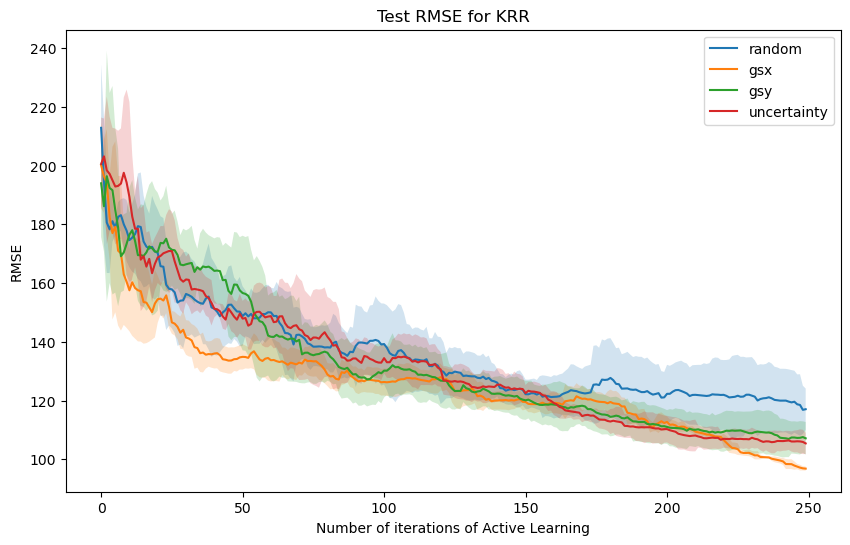

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Test RMSE for KRR'}, xlabel='Number of iterations of Active Learning', ylabel='RMSE'>)

In [438]:
test_rmse = (test_rsme_random, test_rsme_gsx, test_rsme_gsy, test_rmse_uncertainty)


def _plot_rmse(test_rmse, model_name = None, model = None, title = None, filepath = None):
    if model_name == None:
        model_name = str(model).split(" ")[1]
    if model == None:
        model_name = model_name
    if (model_name is None) & (model is None):
        raise ValueError("Please provide the model or model_name")
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    for i, rmse in enumerate(test_rmse):
        ax.plot(rmse.mean(axis=1), label=selection_criteria[i]['crit_name'])
        # calculate the standard deviation
        std = rmse.std(axis=1)
        ax.fill_between(
            range(len(rmse)),
            rmse.mean(axis=1) - std,
            rmse.mean(axis=1) + std,
            alpha=0.2,
        )
    if title == None:
        title = f"Test RMSE for {model_name}"
    else:
        title = title
    ax.set_title(title)
    ax.set_xlabel("Number of iterations of Active Learning")
    ax.set_ylabel("RMSE")
    ax.legend()
    if filepath != None:
        plt.savefig(filepath)
    plt.show()
    return fig, ax

_plot_rmse(test_rmse, model_name = "KRR")

# extract Validation RMSE

In [439]:
data_krr.head()

,rmse_test_KRR_random_0,rmse_val_KRR_random_0,sample_sel_KRR_random_0,rmse_full_KRR_random_0,rmse_test_KRR_gsx_0,rmse_val_KRR_gsx_0,sample_sel_KRR_gsx_0,rmse_full_KRR_gsx_0,rmse_test_KRR_gsy_0,rmse_val_KRR_gsy_0,...,sample_sel_KRR_gsx_4,rmse_full_KRR_gsx_4,rmse_test_KRR_gsy_4,rmse_val_KRR_gsy_4,sample_sel_KRR_gsy_4,rmse_full_KRR_gsy_4,rmse_test_KRR_uncertainty_4,rmse_val_KRR_uncertainty_4,sample_sel_KRR_uncertainty_4,rmse_full_KRR_uncertainty_4
0,236.165436,292.634460,1153.0,85.951596,216.680973,220.140122,771.0,85.951596,216.680973,220.140122,...,771.0,85.951596,173.806485,223.711295,676.0,85.951596,204.542470,236.649444,771.0,85.951596
1,179.558417,230.606482,653.0,85.951596,207.583822,213.801721,787.0,85.951596,179.245298,198.650271,...,787.0,85.951596,165.825834,184.613113,771.0,85.951596,199.504175,230.222798,787.0,85.951596
2,176.493179,230.804587,181.0,85.951596,200.042067,209.127018,1191.0,85.951596,196.225009,205.855466,...,1191.0,85.951596,166.024042,190.037258,132.0,85.951596,199.649982,230.194189,169.0,85.951596
3,190.405290,235.284204,93.0,85.951596,186.341837,198.437021,789.0,85.951596,207.508425,209.632782,...,789.0,85.951596,163.294541,184.384479,885.0,85.951596,191.437240,217.317044,847.0,85.951596
4,173.071534,232.769283,445.0,85.951596,172.013021,196.567628,838.0,85.951596,183.085810,195.988869,...,838.0,85.951596,167.729005,193.225857,27.0,85.951596,189.185705,214.200812,781.0,85.951596


In [440]:
def _seperate_results_val(results, model = None, model_name = None): 

    val_rsme_random = pd.DataFrame()
    val_rsme_gsx = pd.DataFrame()
    val_rsme_gsy = pd.DataFrame()
    val_rmse_uncertainty = pd.DataFrame()
    if model_name == None:
        model_name = str(model).split(" ")[1]
    if model == None:
        model_name = model_name
    if (model_name is None) & (model is None):
        raise ValueError("Please provide the either model or model_name")
    val_rsme_random = pd.concat(
        [
            val_rsme_random,
            results.filter(regex=f"rmse_val_{model_name}_random"),
        ],
        axis=1,
    )
    val_rsme_gsx = pd.concat(
        [
            val_rsme_gsx,
            results.filter(
                regex=f"rmse_val_{model_name}_gsx"
            ),
        ],
        axis=1,
    )
    val_rsme_gsy = pd.concat(
        [
            val_rsme_gsy,
            results.filter(
                regex=f"rmse_val_{model_name}_gsy"
            ),
        ],
        axis=1,
    )
    val_rmse_uncertainty = pd.concat(
        [
            val_rmse_uncertainty,
            results.filter(
                regex=f"rmse_val_{model_name}_uncertainty"
            ),
        ],
        axis=1,
    )
    
    return val_rsme_random, val_rsme_gsx, val_rsme_gsy, val_rmse_uncertainty

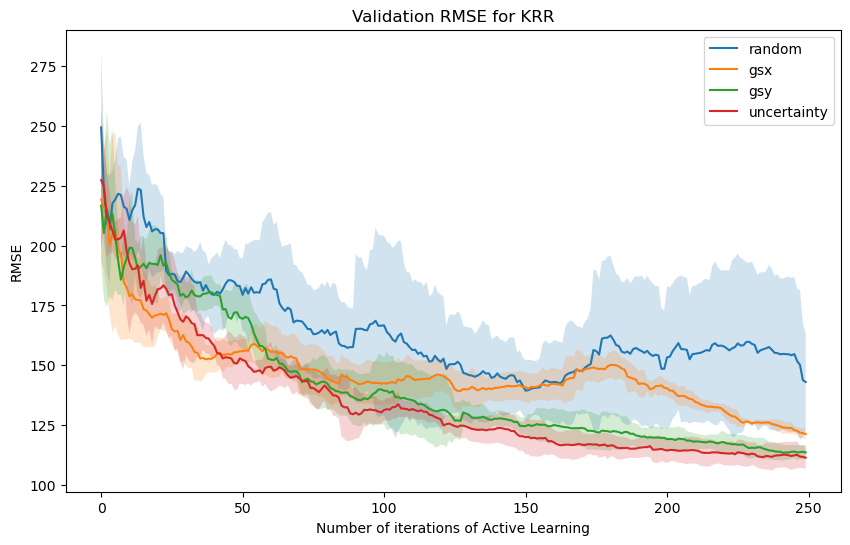

In [441]:
model_name = "KRR"
filepath = FIGURE_PATH + "val_rmse_krr.png"
sep_res_val = _seperate_results_val(data_krr, model_name = model_name)
plot = _plot_rmse(sep_res_val, model_name = model_name, title = f"Validation RMSE for {model_name}", filepath = filepath)

## Calc Mean Area Under the Curve

In [442]:
# the are under the curve is the area between the curve and the x-axis
# here we calculate the area under the curve for both the validation and test RMSE
# the mean(rmse) can be calculated as the mean(rmse) for each learning step and selection criteria
# the mean area can be calculated as the sum of the mean(rmse) 

# for each iteration step 
for sel_crit, rmse in enumerate(test_rmse):
    # calculate the mean rmse
    rmse_mean_per_iteration = rmse.mean(axis=1) #axis = 1 -> row wise
    # calculate the area under the curve
    auc = sum(rmse_mean_per_iteration).__round__(0)
    print(f"The area under the curve for {selection_criteria[sel_crit]['crit_name']} is {auc}")

    # for each selection criteria
    

The area under the curve for random is 34072.0
The area under the curve for gsx is 31440.0
The area under the curve for gsy is 32954.0
The area under the curve for uncertainty is 33063.0


In [461]:
for i, rmse in enumerate(test_rmse):
    aucs = []
    # calculate the AUC for each selection criteria by taking the mean of the RMSE for learning step
    for rmse in test_rmse:
        aucs.append(np.mean(rmse.mean(axis=1)))
    print(f"Model: {model_name}, Selection Criteria: {selection_criteria[i]['crit_name']}, AUC: {aucs[i]}")

Model: KRR, Selection Criteria: random, AUC: 136.2876925910397
Model: KRR, Selection Criteria: gsx, AUC: 125.75857213379798
Model: KRR, Selection Criteria: gsy, AUC: 131.81679029494367
Model: KRR, Selection Criteria: uncertainty, AUC: 132.25168311912952


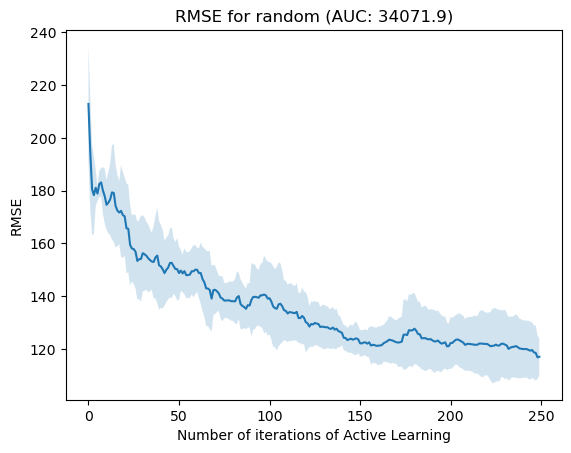

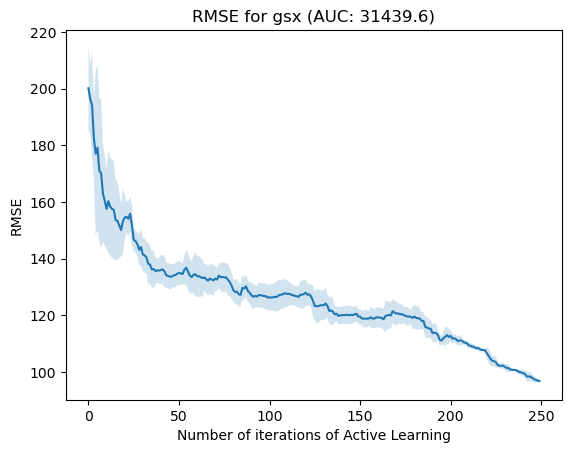

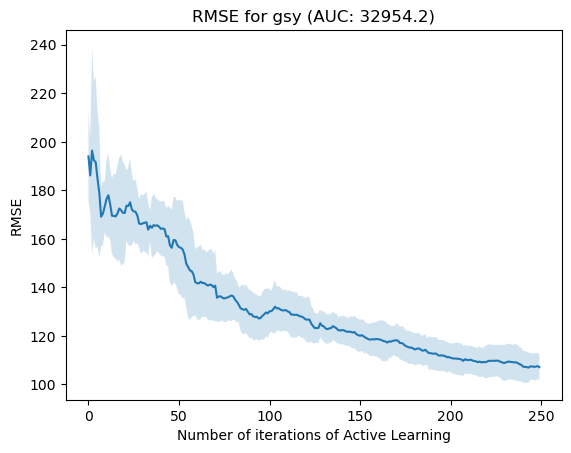

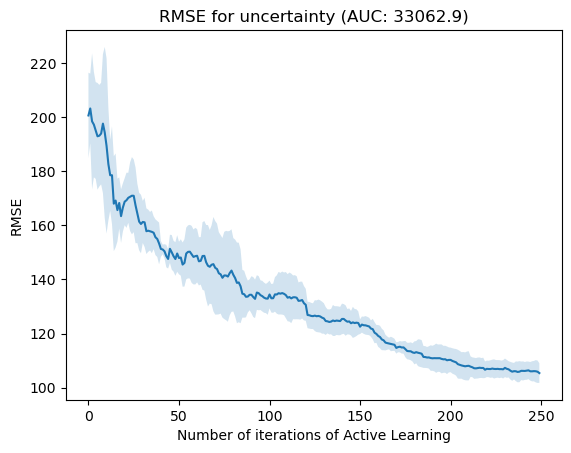

In [460]:
for i, rmse in enumerate(test_rmse):
    rmse_mean_per_iteration = rmse.mean(axis=1)  # axis = 1 -> row wise

    # calc the std for each iteration
    std_rmse_mean_per_iteration = rmse.std(axis=1).round(3)

    # calculate the area under the curve
    auc = sum(rmse_mean_per_iteration).__round__(1)

    # calculate the mean of the AUC
    auc_mean = np.mean(rmse_mean_per_iteration).__round__(1)

    # calculate the standard deviation of the AUC
    auc_std = rmse_mean_per_iteration.std().__round__(1)

    # plot the development of the RMSE over the learning steps
    plt.plot(rmse_mean_per_iteration)
    plt.fill_between(
        range(len(rmse_mean_per_iteration)),
        rmse_mean_per_iteration - std_rmse_mean_per_iteration,
        rmse_mean_per_iteration + std_rmse_mean_per_iteration,
        alpha=0.2,
    )
    plt.title(f"RMSE for {selection_criteria[i]['crit_name']} (AUC: {auc})")
    plt.xlabel("Number of iterations of Active Learning")
    plt.ylabel("RMSE")
    plt.show()

# calculate the mean Area under the Curve for each sampling strategy and return the results
 # old
def _calculate_auc(test_rmse):
    aucs = []
    for i, rmse in enumerate(test_rmse): #for each selection criteria
        rmse_mean_per_iteration = rmse.mean(axis=1) #axis = 1 -> row wise
        # calculate the area under the curve
        auc = sum(rmse_mean_per_iteration).__round__(1)
        auc_std = rmse.mean(axis=1).std().round(3)

        print(f"AUC for {selection_criteria[i]['crit_name']} is: {auc} (STD: {auc_std})")
        globals()[f"{selection_criteria[i]['crit_name']}_auc"] = auc
        globals()[f"{selection_criteria[i]['crit_name']}_auc_std"] = auc_std
        aucs.append((auc, auc_std))
    return aucs

aucs = _calculate_auc(test_rmse)

In [455]:
std_rmse_mean_per_iteration

0      15.796
1      12.870
2      25.113
3      19.472
4      17.864
        ...  
245     3.718
246     3.769
247     4.115
248     4.142
249     3.615
Length: 250, dtype: float64

In [456]:
def _calculate_auc(results): #test_rmse
    """
    Calculate the Area under the curve for each selection criteria from the 
    post-processed results
    Parameters:
    results: list of dataframes
    Returns:
    aucs: list of tuples (AUC, std_rmse_mean_per_iteration, AUC_mean, auc_std)
        each tuple contains the AUC, the standard deviation of the AUC, the mean of the AUC and the standard deviation of the RMSE
        AUC: float, the area under the curve
        std_rmse_mean_per_iteration: float, the standard deviation of the RMSE for each iteration
        AUC_mean: float, the mean of the AUC
        auc_std: float, the standard deviation of the AUC
    """
    aucs = []
    for i, rmse in enumerate(results):  # for each selection criteria

        rmse_mean_per_iteration = rmse.mean(axis=1)  # axis = 1 -> row wise

        # calc the std for each iteration
        std_rmse_mean_per_iteration = rmse.std(axis=1).round(3)

        # calculate the area under the curve
        auc = sum(rmse_mean_per_iteration).__round__(1)

        # calculate the mean of the AUC
        auc_mean = np.mean(rmse_mean_per_iteration).__round__(1)

        # calculate the standard deviation of the RMSE for each iteration
        auc_std = rmse_mean_per_iteration.std().__round__(1)
        aucs.append((auc, std_rmse_mean_per_iteration, auc_mean, auc_std))
    return aucs

In [464]:
def _plot_auc(aucs, model_name, filepath, title = None):
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    for i, auc in enumerate(aucs):
        ax.bar(selection_criteria[i]['crit_name'], auc[2], yerr=auc[3], label=selection_criteria[i]['crit_name'], capsize = 5)
    if title == None:
        title = f"AUC/iteration for {model_name}"
    else:
        title = title
    ax.set_title(title)
    ax.set_ylabel("AUC")
    if filepath != None:
        plt.savefig(filepath)
    plt.show()
    return fig, ax

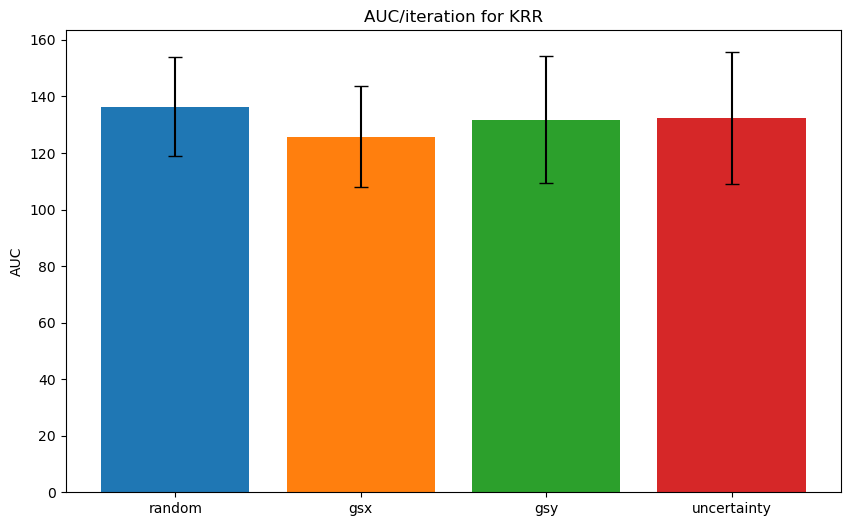

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'AUC/iteration for KRR'}, ylabel='AUC'>)

In [465]:
# test revised _plot_auc function
aucs = _calculate_auc(test_rmse)
_plot_auc(aucs, model_name = "KRR", filepath = FIGURE_PATH + "auc_krr.png")

# plot the aucs with the standard deviation
def _plot_auc(aucs, model_name, filepath, title = None):
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    for i, auc in enumerate(aucs):
        ax.bar(selection_criteria[i]['crit_name'], auc[0], yerr=auc[1], label=selection_criteria[i]['crit_name'], capsize = 5)
    if title == None:
        title = f"AUC for {model_name}"
    else:
        title = title
    ax.set_title(title)
    ax.set_ylabel("AUC")
    if filepath != None:
        plt.savefig(filepath)
    plt.show()

filepath = FIGURE_PATH + "auc_KRR.png"
_plot_auc(aucs, model_name = "KRR", filepath = filepath)

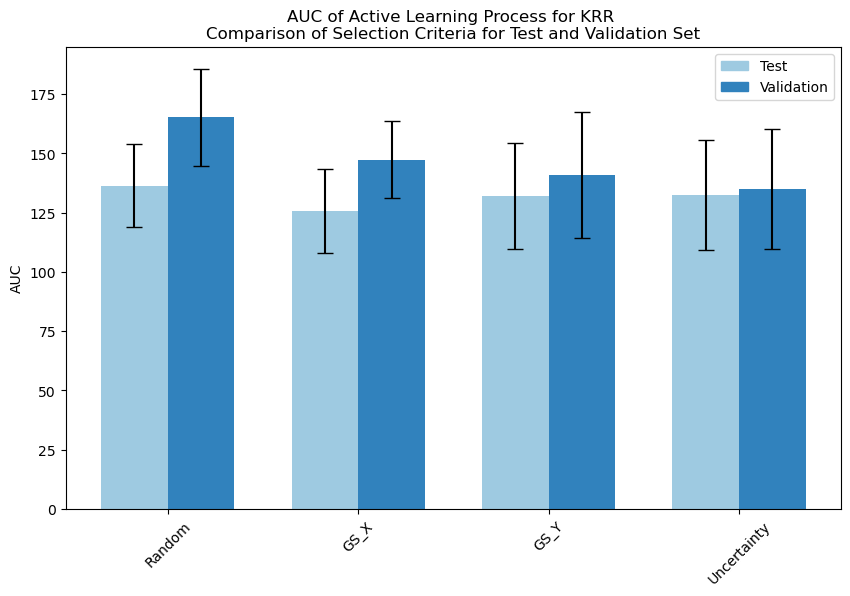

In [470]:
# generate a combined plot for the AUCs
import matplotlib.patches as mpatches

def combined_auc_plot(mean_auc_test, mean_auc_val, model_name, filepath=None):
    """Generate a barplot of the mean AUC for the test and validation set for each selection criteria
    ----------
    Parameters:
    mean_auc_test: list of tuples, the mean AUC for the test set for each selection criteria
    mean_auc_val: list of tuples, the mean AUC for the validation set for each selection criteria
    model_name: str, the name of the model
    filepath: str, the path to save the plot
    ----------
    Returns:
    fig, ax: the figure and axis of the plot"""
    # select two nice colors
    colour_selection = ["#9ecae1", "#3182bd"]
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    index = np.arange(len(selection_criteria))
    barwidth = 0.35
    # plot the test aucs
    # correct code
    for i, (_, _, auc_mean, auc_err) in enumerate(mean_auc_test):
        ax.bar(
            index[i] - barwidth / 2,
            auc_mean,
            yerr=auc_err,
            label=f"{selection_criteria[i]['crit_name']} test",
            align="center",
            width=barwidth,
            color=colour_selection[0],
            capsize=6,
        )
    for i,  (_, _, auc_mean, auc_err) in enumerate(mean_auc_val):
        ax.bar(
            index[i] + barwidth / 2,
            auc_mean,
            yerr=auc_err,
            label=f"{selection_criteria[i]['crit_name']} val",
            align="center",
            width=barwidth,
            color=colour_selection[1],
            capsize=6,
        )
    title = f"AUC of Active Learning Process for {model_name} \nComparison of Selection Criteria for Test and Validation Set"

    # incorrect code
    # for i, auc in enumerate(aucs_test):
    #     ax.bar(selection_criteria[i]['crit_name'], auc[0], yerr=auc[1], label=f"{selection_criteria[i]['crit_name']} test", align='center', width=barwidth )
    # for i, auc in enumerate(auc_val):
    #     ax.bar(selection_criteria[i]['crit_name'], auc[0], yerr=auc[1], label=f"{selection_criteria[i]['crit_name']} val", align='center',width=barwidth)
    # title = f"AUC for {model_name}"
    ax.set_title(title)
    ax.set_ylabel("AUC")
    fig.legend = ax.legend()
    # x_labels = [
    #     selection_criteria[i]["crit_name"] for i in range(len(selection_criteria))
    # ]
    x_labels = ["Random", "GS_X", "GS_Y", "Uncertainty"]
    fig.xticks = ax.set_xticks(
        [i + 0.001 * barwidth for i in index], x_labels, rotation=45
    )
    # fix the legend
    c0_patch = mpatches.Patch(color=colour_selection[0], label="Test")
    c1_patch = mpatches.Patch(color=colour_selection[1], label="Validation")

    ax.legend(
        handles=[c0_patch, c1_patch],
    )
    if filepath != None:
        plt.savefig(filepath + f"combined_auc_{model_name}.png")
    plt.show()
    return fig, ax


def test_combined_auc_plot():
    mean_auc_test = _calculate_auc(test_rmse)
    mean_auc_val = _calculate_auc(sep_res_val)
    combined_auc_plot(mean_auc_test, mean_auc_val, model_name = "KRR")

test_combined_auc_plot()

# final report function

In [476]:
# perform the analysis and plotting in an automated way
def report_al_results(results, model_name, filepath):
    test_rmse = _seperate_results_test(results = results, model_name = model_name)
    val_rmse = _seperate_results_val(results, model_name = model_name)
    # generate the test rmse plot
    _plot_rmse(test_rmse, model_name = model_name, filepath = filepath + f"test_rmse_{model_name}.png")
    # generate the validation rmse plot
    _plot_rmse(sep_res_val, model_name = model_name, title = f"Validation RMSE for {model_name}", filepath = filepath + f"val_rmse_{model_name}.png")
    # calculate the auc for both rmse
    # aucs_test = _calculate_auc(test_rmse)
    # aucs_val = _calculate_auc(val_rmse)

    # generate the auc plot
    # (auc, std_rmse_mean_per_iteration, auc_mean, auc_std) = _calculate_auc(results)
    # _plot_auc(auc_mean, model_name = model_name, filepath = filepath + f"auc_{model_name}.png")

    #revised
    mean_auc_test = _calculate_auc(test_rmse)
    mean_auc_val = _calculate_auc(val_rmse)
    combined_auc_plot(mean_auc_test, mean_auc_val, model_name = model_name, filepath = filepath + f"combined_auc_{model_name}.png")


## KRR

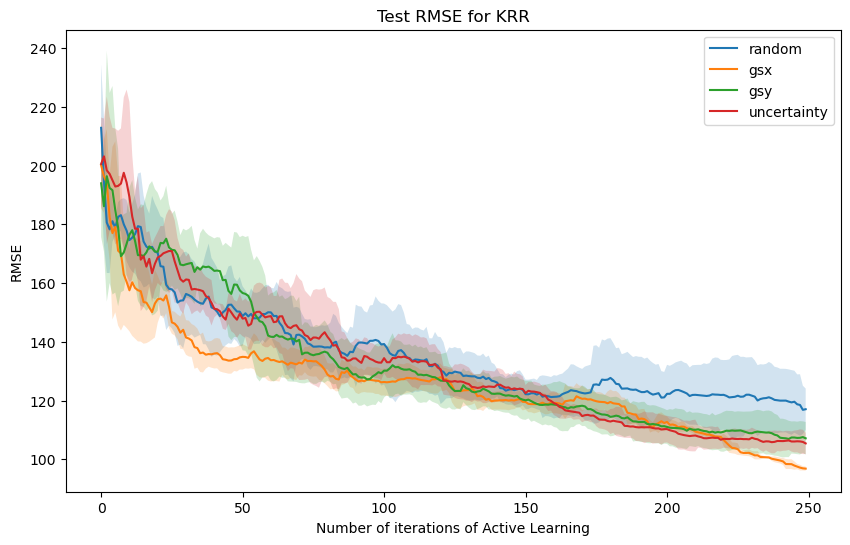

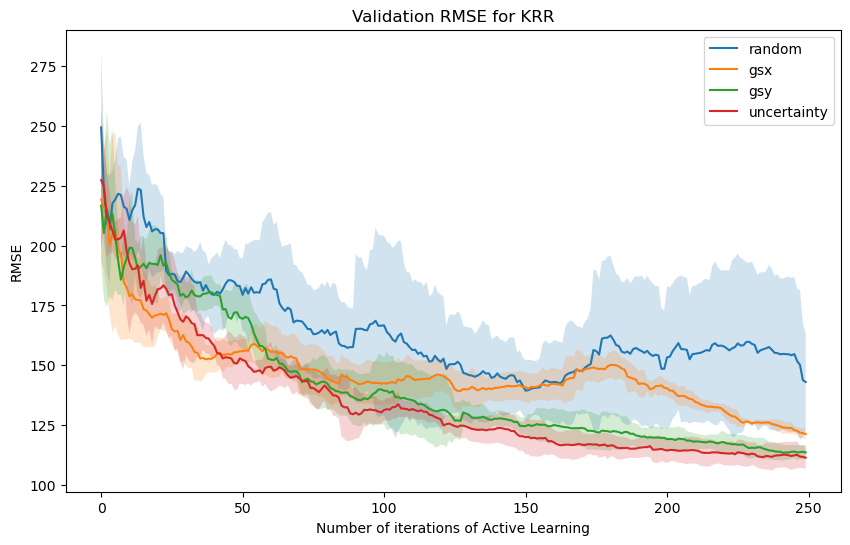

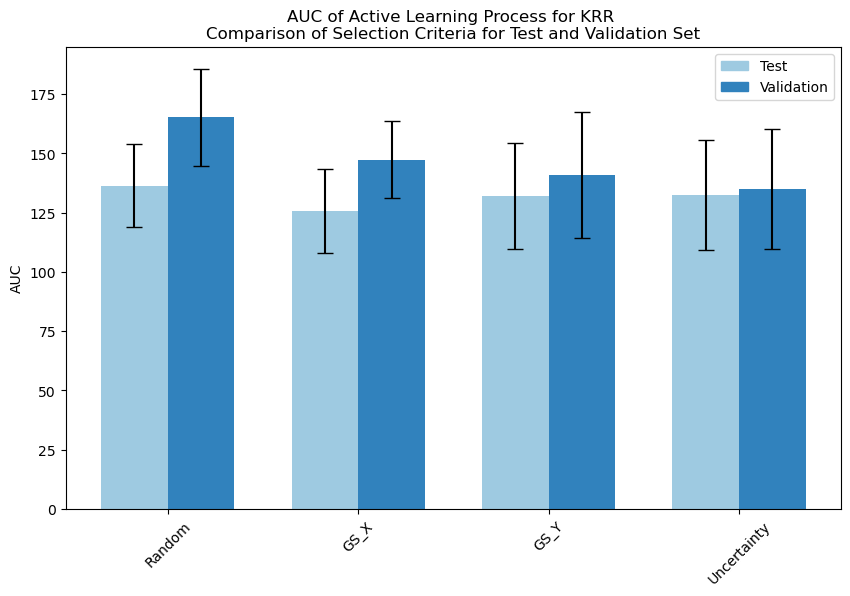

In [477]:
model_name = "KRR"
filepath = FIGURE_PATH + "results_visualization/"
report_al_results(data_krr, model_name = "KRR", filepath = filepath)

## PLS

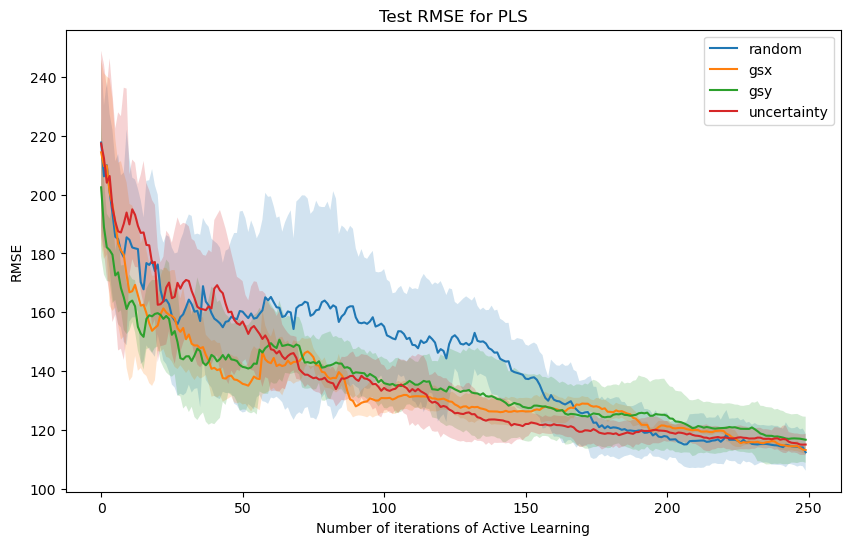

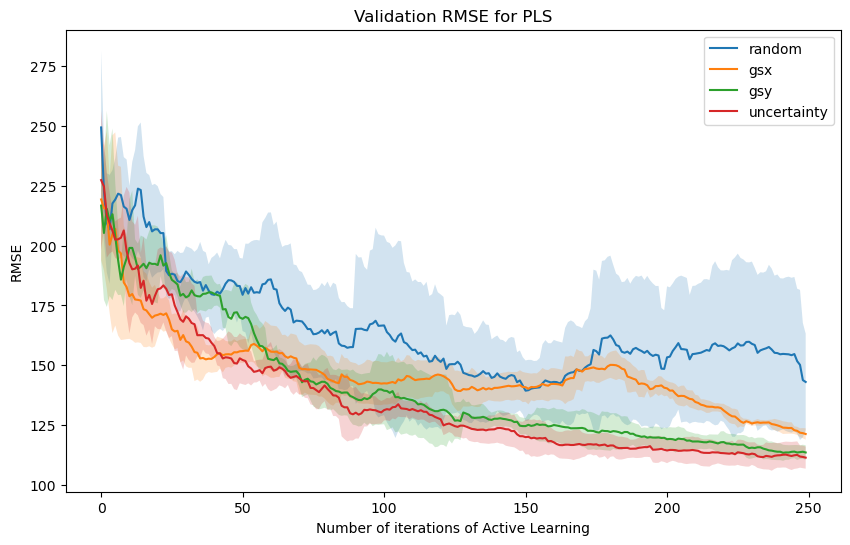

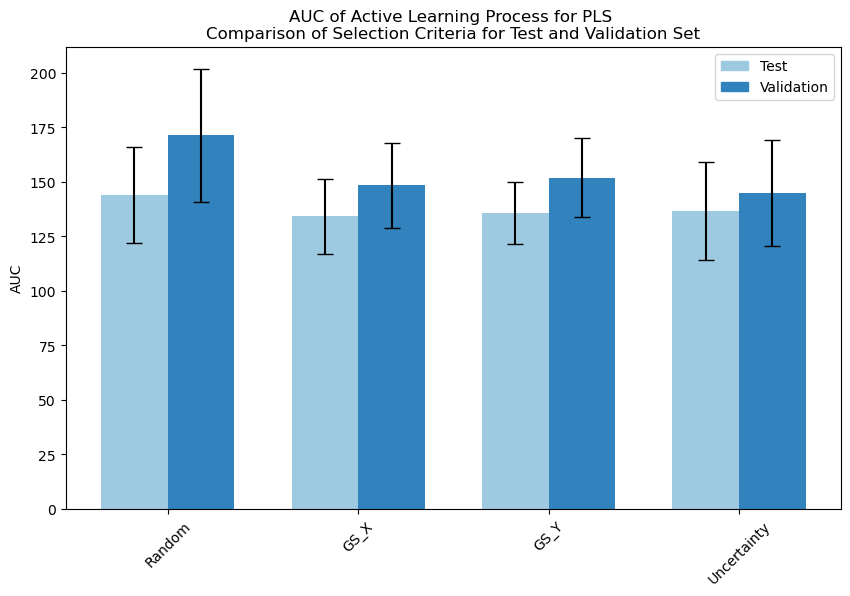

In [478]:
filepath = FIGURE_PATH + "results_visualization/"
report_al_results(data_pls, model_name = "PLS", filepath = filepath)

## RF

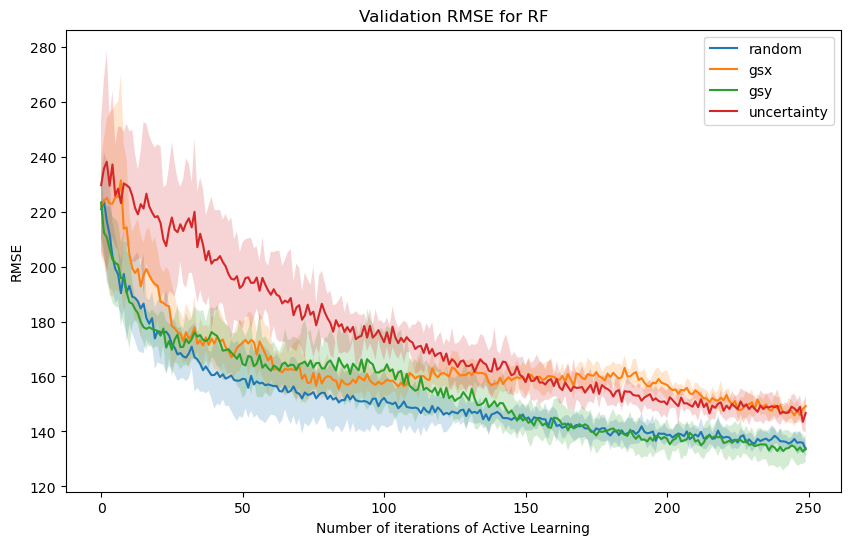

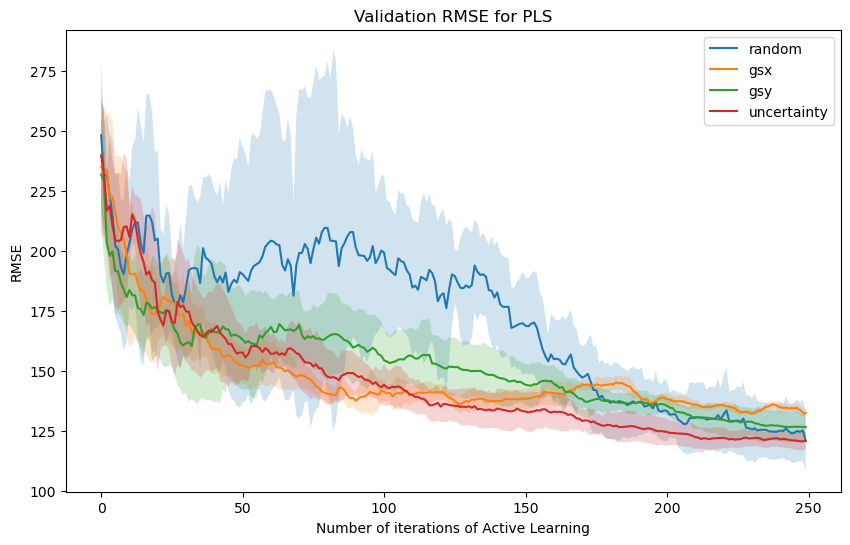

In [479]:
# Investigate the validation results for rf

df_val_rf = _seperate_results_val(data_rf, model_name = "RF")
df_val_pls = _seperate_results_val(data_pls, model_name = "PLS")
plot_rf = _plot_rmse(df_val_rf, model_name = "RF", title = "Validation RMSE for RF", filepath = FIGURE_PATH + "val_rmse_rf.png")
plot_pls = _plot_rmse(df_val_pls, model_name = "PLS", title = "Validation RMSE for PLS", filepath = FIGURE_PATH + "val_rmse_pls.png")

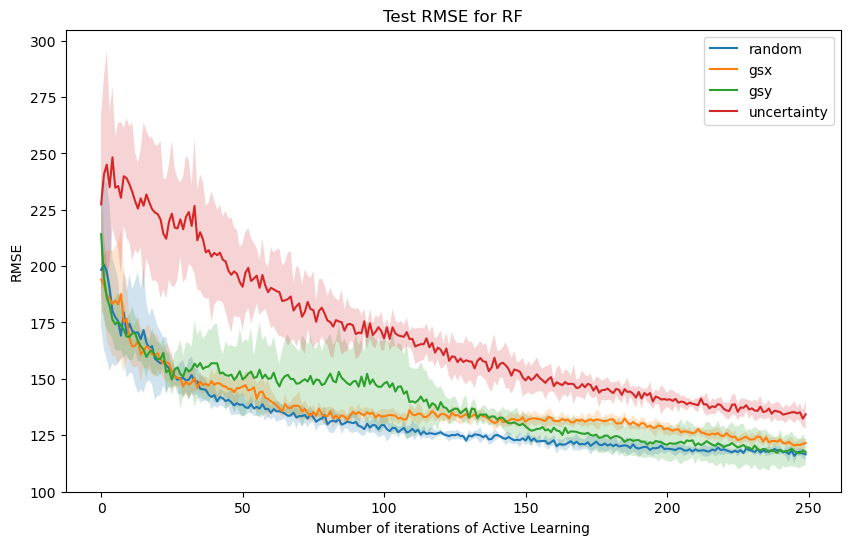

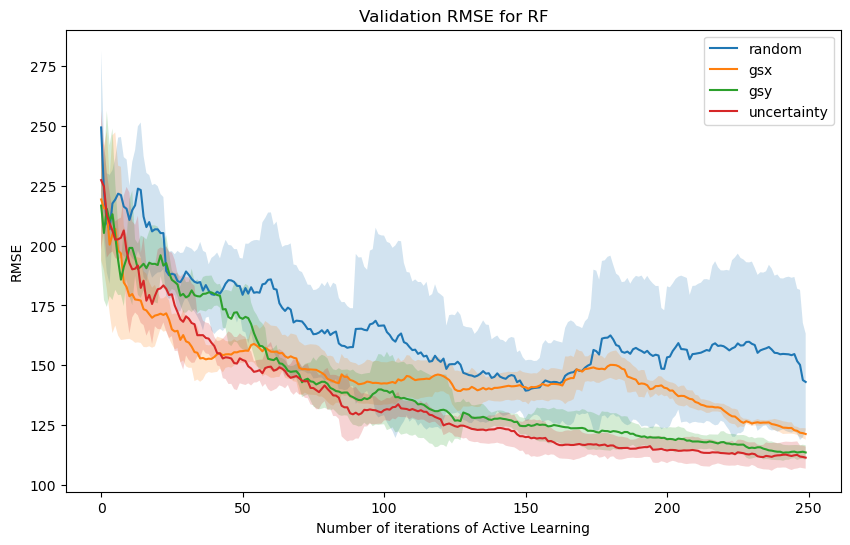

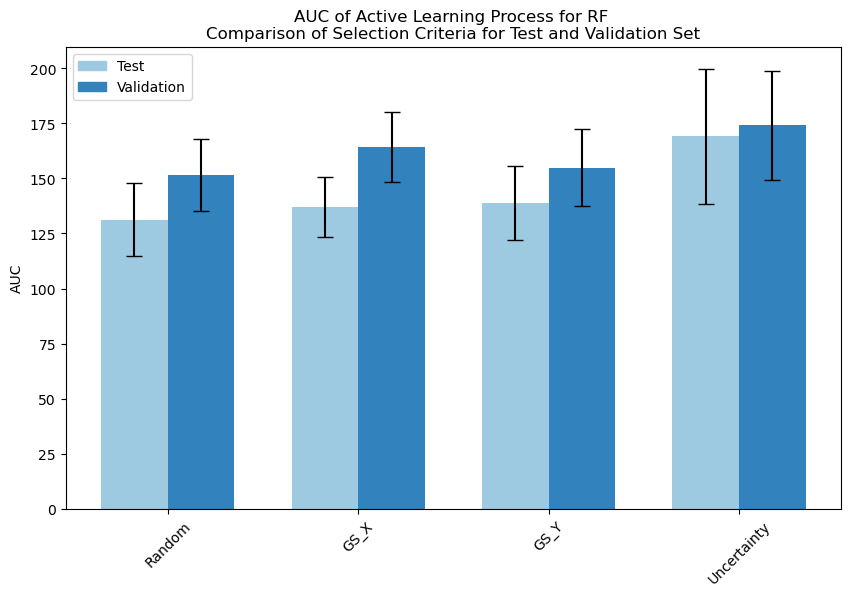

In [480]:
filepath = FIGURE_PATH + "results_visualization/"
report_al_results(data_rf, model_name = "RF", filepath = filepath)